# This is an analysis of Diabetic Retinopathy dataset (resized)

The initial competition dataset consisted of images in resolution ~ 2500x1500. All the images had to be resized to smaller resolutions in order to use them in classification approach. All the images were resized to max 1000px for the smaller picture side (so either width or height is 1000 px). Dataset prepared in this was was then saved.

# Label distribution among the classes in the dataset

([<matplotlib.axis.XTick at 0x7f9108aa90d0>,
 [Text(0, 0, 'No DR'),
  Text(1, 0, 'Mild'),
  Text(2, 0, 'Moderate'),
  Text(3, 0, 'Severe'),
  Text(4, 0, 'Proliferative DR')])

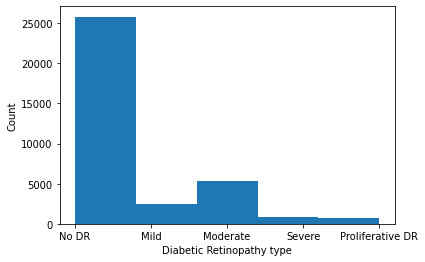

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

labels = pd.read_csv("../data/trainval/labels.csv")
plt.hist(labels["level"], density=False, bins=5)
plt.ylabel('Count')
plt.xlabel('Diabetic Retinopathy type')
plt.xticks(np.arange(5), ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'])

First thing that is noticeable is that the dataset is very imbalanced.

# Examples of images in the dataset

Text(0.5, 1.0, 'Proliferative DR')

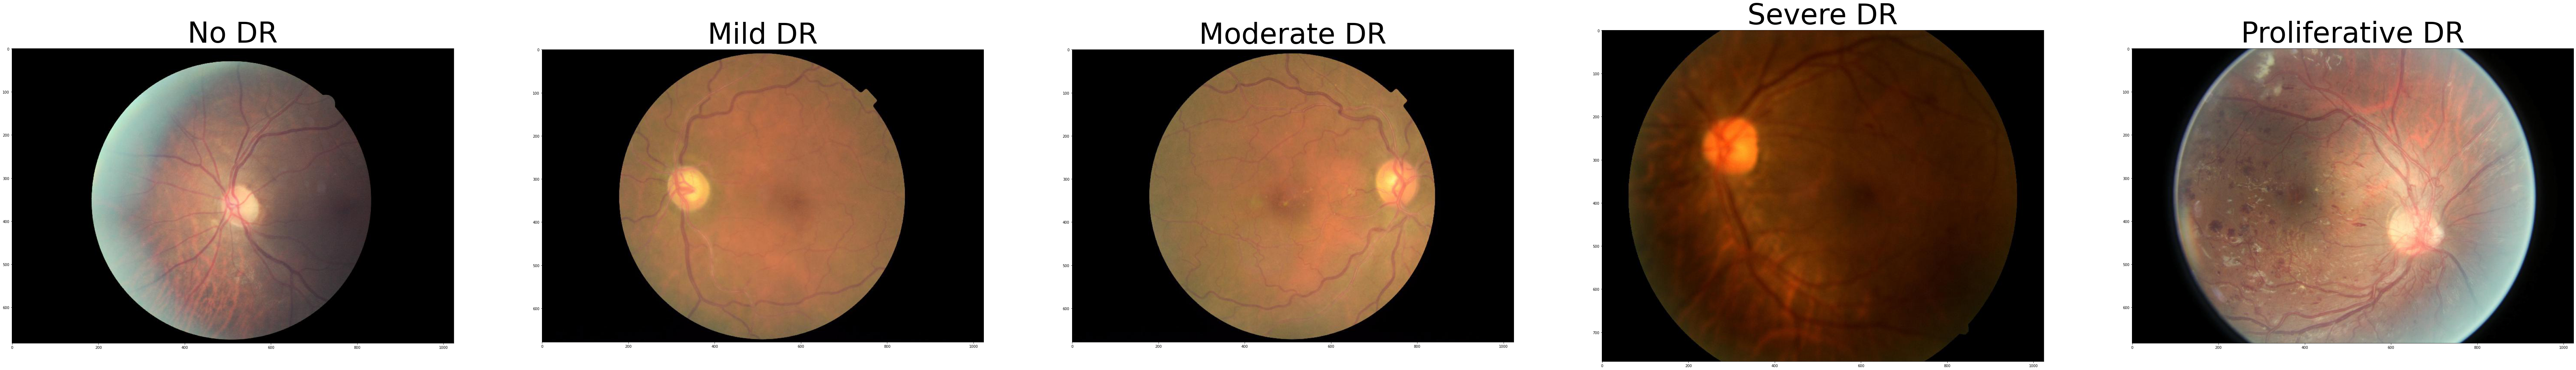

In [20]:
from PIL import Image

no_dr = labels.loc[labels["level"] == 0]["image"].values[0]
mild_dr = labels.loc[labels["level"] == 1]["image"].values[0]
moderate_dr = labels.loc[labels["level"] == 2]["image"].values[0]
severe_dr = labels.loc[labels["level"] == 3]["image"].values[0]
proliferative_dr = labels.loc[labels["level"] == 4]["image"].values[0]

f, axarr = plt.subplots(1,5, figsize=(128, 128))
axarr[0].imshow(Image.open(f"../data/trainval/{no_dr}.jpeg"))
axarr[1].imshow(Image.open(f"../data/trainval/{mild_dr}.jpeg"))
axarr[2].imshow(Image.open(f"../data/trainval/{moderate_dr}.jpeg"))
axarr[3].imshow(Image.open(f"../data/trainval/{severe_dr}.jpeg"))
axarr[4].imshow(Image.open(f"../data/trainval/{proliferative_dr}.jpeg"))
axarr[0].set_title("No DR", fontsize=80)
axarr[1].set_title("Mild DR", fontsize=80)
axarr[2].set_title("Moderate DR", fontsize=80)
axarr[3].set_title("Severe DR", fontsize=80)
axarr[4].set_title("Proliferative DR", fontsize=80)


Due to different hardware application in order to get those scans the images vary in some ways. They are cropped in different ways for example.

# Trainval and Test split sizes

Trainval dataset:

Trainval dataset size: 30172


([<matplotlib.axis.XTick at 0x7f90dfdb0f40>,
 [Text(0, 0, 'No DR'),
  Text(1, 0, 'Mild'),
  Text(2, 0, 'Moderate'),
  Text(3, 0, 'Severe'),
  Text(4, 0, 'Proliferative DR')])

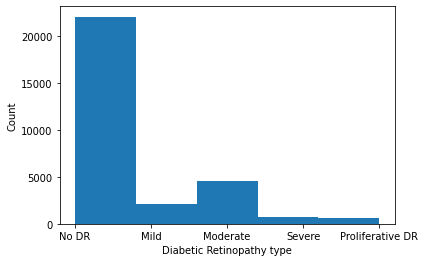

In [26]:
from pathlib import Path

trainval_dir = "../data/trainval"
labels = pd.read_csv(f"{trainval_dir}/labels.csv")
samples = [
    labels.loc[labels["image"] == sample_path.stem]["level"].values[0]
    for sample_path 
    in Path(trainval_dir).rglob("*.jpeg")
]
samples_np = np.array(samples)
print(f"Trainval dataset size: {len(samples_np)}")
plt.hist(samples_np, density=False, bins=5) 
plt.ylabel('Count')
plt.xlabel('Diabetic Retinopathy type')
plt.xticks(np.arange(5), ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'])

Test dataset

Test dataset size: 4954


([<matplotlib.axis.XTick at 0x7f9061278250>,
 [Text(0, 0, 'No DR'),
  Text(1, 0, 'Mild'),
  Text(2, 0, 'Moderate'),
  Text(3, 0, 'Severe'),
  Text(4, 0, 'Proliferative DR')])

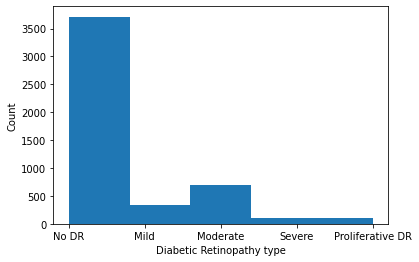

In [27]:
trainval_dir = "../data/test"
labels = pd.read_csv(f"{trainval_dir}/labels.csv")
samples = [
    labels.loc[labels["image"] == sample_path.stem]["level"].values[0]
    for sample_path 
    in Path(trainval_dir).rglob("*.jpeg")
]
samples_np = np.array(samples)
print(f"Test dataset size: {len(samples_np)}")
plt.hist(samples_np, density=False, bins=5) 
plt.ylabel('Count')
plt.xlabel('Diabetic Retinopathy type')
plt.xticks(np.arange(5), ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR'])